# Instructions[^1] {-}

1. Download the provided jupyter notebook file to your computer.
2. Write all your answers and code into this notebook file.
3. When your work is completed, export your notebook to an HTML file.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.

[^1]: Problems 1 and 2 of this problem set were originally designed in collaboration with Dan Levy.

## Identification {-}

### Your Information {-}

Your Last Name: Latrofa

Your First Name: Ania


### Group Members (list any classmates you worked with on this problem set) {-}

Your Group Members:

# Problem 1 - Elections in Venezuela {-}

Venezuelans voted on a referendum to recall President Hugo Chavez on August 15th, 2004. The official results gave the victory to Pres. Chavez (59% in favor of keeping him in office and 41% against). Opposition supporters argued that there was fraud. This question asks you to put yourself in the position of an objective statistical analyst trying to find out whether the opposition claims are supported by the evidence.

This problem set question is based on real events, but we will make a few simplifying assumptions. The voting process worked for the most part in the following manner: Each voter was assigned to one of the `8,394` voting centers nationwide. In each voting center, there were two electoral machines. Voters had to select 'Yes' (the option favoring recalling the president) or 'No' (the option favoring keeping the president in office). 

## 1-A {-}

The pro-opposition governor of a state declared fraud shortly after the official results were announced. According to these results, two machines in one of the centers located in this governor’s state reported the __exact same__ number of 'Yes' votes (207). The table below describes the voting results for this center. The governor argued that it was extremely unlikely for this event to occur and said this was evidence of fraud.

| Voting Center X   | Yes Votes     | No Votes |
| :----       |    :----   |          :---- |
| Machine #1   | 207 | 293   |
| Machine #2   | 207 | 293   |

Calculate the probability that both machines in this center reported exactly 207 'Yes' votes. In doing this, you may make the following assumptions:

* Voters were distributed randomly across the two machines in each center and the results of voting outcomes in both machines are independent
* For any given person, the probability of voting 'Yes' is $40\%$. Denote this probability as `p` and assume this probability is the same for the two machines in each voting center.

In other words, you may assume the number of 'Yes' votes follows a binomial distribution.

You can calculate the probability mass of a binomial distribution as:

$$P(X=k) = {n \choose k} p^k (1-p)^{n-k} $$

Otherwise you may also use functionality contained in the `scipy` library. If you need to install this package you may run the following code:

```python
pip install scipy
```

After installing packages, you can load the [binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) function with the following code.

```python
from scipy.stats import binom
```

After loading this package, read the documentation for the `.pmf()` method which will calculate the probability mass function of a binomial distribution with provided inputs.

_Your answer here:_

$$P("YES"=207) = {500 \choose 207} 0.4^{207} (0.6)^{293} $$
$$P(Two machines give 207 "YES") = P("YES"=207)^{2}$$

In [24]:
prob_machine = binom.pmf(207, 500, 0.4)
print(f"Probability for one machine: {prob_machine*100:.3f}%")

Probability for one machine: 2.954%


In [25]:
prob_machines = prob_machine**2
print(f"Probability for both machines: {prob_machines*100:.3f}%")

Probability for both machines: 0.087%


In [87]:
# Loading Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
# Reading the documentation
?binom.pmf

Signature: binom.pmf(k, *args, **kwds)
Docstring:
Probability mass function at k of the given RV.

Parameters
----------
k : array_like
    Quantiles.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
pmf : array_like
    Probability mass function evaluated at k
File:      /opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method

## 1-B {-}

Calculate the probability that both machines in this center reported exactly the same number of “Yes” votes (regardless of whether it’s 207 or some other number). Call this probability `q` and report your estimate.

Hint: You can follow the procedure used above, but you will need to modify your code to consider _all_ possible values of `Yes` votes the two machines could both report simultaneously (_e.g._ $\{0, 1, \dots\}$). You may use the same assumptions as in the above problem.

Hint: you could use a loop to iterate over all the possible values. Alternatively you could try passing a list or an array as an argument in your function used to calculate the probability mass function.

_Your answer here:_

In [28]:
q = 0
for k in range(501):
    prob_one = binom.pmf(k, 500, 0.4)
    prob_both = prob_one ** 2
    q = q + prob_both
print(f'Probability that both machines report the same number of "Yes" votes: {q*100:.3f}%')

Probability that both machines report the same number of "Yes" votes: 2.575%


## 1-C {-}

Other people started noticing that in their voting center both machines had the same number of 'Yes' votes. Calculate how many centers you would predict would have the same number of 'Yes' votes on average. You can make the same assumptions as in part (a), and assume that the two machines in each center received the same total number of votes (500 votes per machine) and that voting centers are independent.

_Your answer here:_

In [36]:
national_centers = 8394
same_results_exp = q * national_centers
print(f'{int(same_results_exp)} centers might have the same number of "Yes" votes, on average')

216 centers might have the same number of "Yes" votes, on average


## 1-D {-}

The number of voting centers that exhibit the same number of 'Yes' votes that you calculated in (c) is an __expected value__. But because of random fluctuations, the actual number could be higher or lower on any given election day. This question asks you to _simulate_ 1,000 times what might have happened on election day (_i.e._ how many voting centers would exhibit the same number of “Yes” votes across the two machines if Election Day had happened 1,000 times).  

To do this, you may use the `.rvs()` method in the `binom` function loaded above to generate a random draw from this distribution.

The following code will simulate the number of voting centers (out of `8394`) that had an equal number of 'Yes' votes based on the probability `q` calculated above.

```python
binom.rvs(n=1, p=q, size=8394).sum()
```

Using this code as a base, iterate or simulate this process `1000` times. In each simulation, store the count of the number of voting centers which had the same number of 'Yes' votes. After this simulation, report the following:

1. Average number of voting centers with the same number of yes votes.
2. Is this average similar to the number you calculated in part (c) above? Why or why not?
3. Plot a histogram of your `1000` estimates

Hint: if working with a list you can use the `append()` method to add a newly simulated value. After storing the simulated values, you may find it easier to solve later portions of this problem if you store the information in a pandas `DataFrame` with the `pd.DataFrame()` function.

In [85]:
# Simulating this with a for loop

n_sim = 10**3
count_holder = []

for i in range(n_sim):
    same_results_once = binom.rvs(n=1, p=q, size=8394).sum()
    count_holder.append(same_results_once)

same_results_df = pd.DataFrame({'same centers': count_holder})
average_same_results = same_results_df['same centers'].mean()

print(f'Average number of centers with the same "Yes" votes, with {n_sim} simulations: {int(average_same_results)}')

Average number of centers with the same "Yes" votes, with 1000 simulations: 215


The average number of centers with the same "Yes" votes over 1,000 simulations was 215, which is very close to the expected value I obtained, of 216.
This similarity happens because the simulations are random (each trial gives slightly different results) and when averaged over a high number of repetitions, the outcome obtained is close to the expected value.

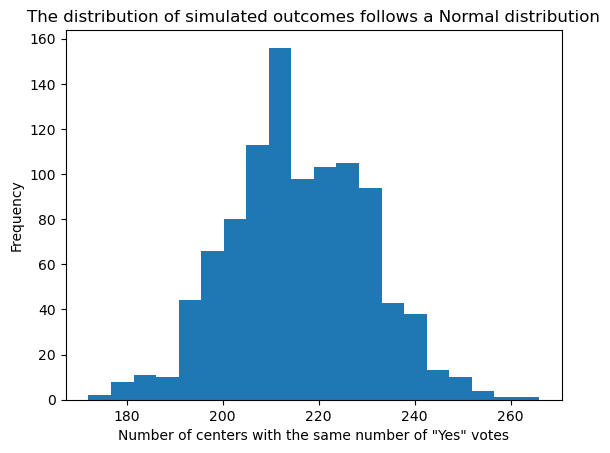

In [98]:
plt.hist(count_holder, bins=20)
plt.xlabel('Number of centers with the same number of "Yes" votes')
plt.ylabel('Frequency')
plt.title('The distribution of simulated outcomes follows a Normal distribution')
plt.show()

## 1-E {-}

As indicated above, the opposition governor argued that it was extremely unlikely to observe two machines in a voting center report the exact number of 'Yes' votes. When other voting centers reported the same, some opposition leaders started counting such centers. Suppose they counted 225 centers that exhibited the same number of 'Yes' votes in their two machines. Would you conclude that this is likely the result of random fluctuations (i.e. due to chance) or such an unlikely event that you think something suspicious might be going on? Explain.

Hint: from your simulated data, can you calculate a range or interval which contains most of the data?

_Your answer here:_

Using the describe() command, we see that the mean number of centers with the same "Yes" votes is around 215, and with the percentile command, we see that 95% of the simulated outcomes should fall within the 188–244 range.
The observed value of 225 lies within the range obtained, indicating that it might be the result of random fluctuations.

In [101]:
same_results_df.describe()

,same centers
count,1000.000000
mean,215.877000
std,14.396567
min,172.000000
25%,206.000000
50%,215.000000
75%,226.000000
max,266.000000


In [104]:
lower, upper = np.percentile(count_holder, [2.5, 97.5])
print(f'95% interval of the simulations: {lower:.0f} – {upper:.0f}')

95% interval of the simulations: 188 – 243


## 1-F {-}

The opposition wants you to tell them how large does the number of voting centers that report the same number of 'Yes' votes have to be for you to conclude that something suspicious might be going on (_i.e._ that the deviations from what you would expect are unlikely to be explained by chance). How would you respond?  

Hint: it may be useful to know the standard deviation for the expected count of the number of voting centers. You can calculate this standard deviation from your simulated data. Alternatively you could look at quantile information from the simulated values themselves.

_Your answer here:_

## 1-G: Venezuela's 2024 Election[^2] {-}

[^2]: The remaining parts of this question were developed in collaboration with Ricardo Benzecry Mancin. 


On July 28, 2024, Venezuela had another election which received international attention for irregularities and criticism that the election was not fair. Both the incumbent Nicolás Maduro and the opposition candidate Edmundo González have claimed victory. 

The provided `RESULTADOS_2024_CSV_V2` contains data downloaded on August 21 from [Resultados Con VZLA](https://resultadosconvzla.com/) relating to the election. The file contains information by voting tables for the major candidates.

As a simple extension of the analysis above, let's count how many voting tables in the 2024 election reported the same number of votes for Maduro and González. This number of votes are contained in column names with the candidate intials, and our focus will be on the columns:

* `EG` - Edmundo González
* `NM` - Nicolás Maduro

Read in the provided data set and answer the following questions:

1. How many total voting tables were there (total number of rows in the data set)?
2. How many tables reported the same number of votes for González as for Maduro?
3. What percentage of tables reported the same number of votes for González as for Maduro?

Note, this file contains characters not encoded in [UTF-8](https://en.wikipedia.org/wiki/UTF-8), so we can pass along a specific encoding argument as part of our call to `pd.read_csv()`. The full list of python encodings is beyond the scope of this problem, but you can read more about them [here](https://saturncloud.io/blog/a-list-of-pandas-readcsv-encoding-options/). For now, we can set the encoding to `latin-1` as part of reading in the file with the following code:

```python
d_ven = pd.read_csv('RESULTADOS_2024_CSV_V2.csv', encoding='latin-1')
```

Read in the data in this way an answer the above questions.

In [5]:
# Your code here

d_ven = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W2 RESULTADOS_2024_CSV_V2.csv', encoding='latin-1')


In [24]:
print(f'There are in total {len(d_ven['EG'])} rows in the González column, and {d_ven['NM'].count()} rows in the Maduro column')

There are in total 25073 rows in the González column, and 25073 rows in the Maduro column


In [19]:
same_votes = (d_ven['EG'] == d_ven['NM']).sum()
print(f'Number of tables with the same number of votes for González and Maduro: {same_votes}')

Number of tables with the same number of votes for González and Maduro: 41


In [22]:
percentage_same_votes = (same_votes/len(d_ven))*100
print(f'The percentage of same number of votes for González and Maduro is: {percentage_same_votes:.2f}%')

The percentage of same number of votes for González and Maduro is: 0.16%


## 1-H: OPTIONAL Percentage of Digitalized Records {-}

In addition to the vote totals, you been given a separate file `digitalized-records-state.xlsx`. This file contains information at the aggregate state level on the percentage of digitized voting records.

This question asks you to make a plot comparing the percentage of digitized records and the Maduro vote share. To do this you will need to.

1. Using the same RESULTADOS_2024_CSV_V2.csv file from the earlier part, calculate the aggregated vote totals for González, Maduro, and all Valid Votes (saved as `VOTOS_VALIDOS`) by state (the state identifier is stored in the column `EDO`)
2. Using the aggregated vote totals by state, calculate the Maduro vote share divided by the total number of valid votes in that state.
3. Merge the aggregate vote totals from steps 1-2 with the provided `digitalized-records-state.xlsx` file. Note that this file stores the identifier of the state in a column named `State`
4. Create a plot to display the relationship between the percentage of digitalized records and the Maduro vote share.

__Hint:__ for Step 3 you may use the [pandas.merge()](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) function. Follow the examples in the linked documentation. You will want to merge on a variable identifying the particular state of the observed values. This column is _not_ saved with the same variable name in the two data sets and you will need to account for this.

In [ ]:
# Your code here:

# Problem 2 - In Search of a COVID VACCINE {-}

With the outbreak of COVID-19, scientists rapidly began the search for a vaccine. Many vaccines were released in record time. This problem set question helps you apply what you have learned about probability and decision trees to understand some of the debates around vaccine development.

## 2-A {-}

Suppose you were a pharmaceutical firm in March 2020 contemplating whether to try to develop a vaccine. You estimate it would take an investment of 100 million dollars to do so. Assume the probability that you will be successful at developing a COVID-19 vaccine is $0.01$. If you succeed, you will earn \$4 billion in net profits from future sales (note this \$4 billion number accounts for the initial investment plus all the costs involved in producing the vaccine). Should you try to develop the vaccine? Draw a decision tree to represent your options. Assume that you are risk neutral and your only criterion is financial.

_Your answer here:_

In order to answer, we need to calculate the Expected Value of the two choices: _Invest_ and _Not invest_

First, we face a decision node, where we choose to either invest or not to invest.  In the _Invest_ branch, we incur into the cost of $100M (to keep in mind for the final payoffs) and we then face the probability of two different outcomes: (scenario 1.a) the investment could be successful, with a probability of 1%; (scenario 1.b) the investment could be unsuccessful, with a probability of 99%, in which case we would not be able to develop the vaccine. In the _Not invest_ branch, we have a unique possibility: (scenario 2) we do not try to develop a vaccine.

The initial payoffs are as follows:

1.a $4B

1.b $100M

2 $0

Taking into account the probabilities, we can find the EV of each branch. The EV of the _Not invest_ branch is $0; the EV of the _Invest_ branch is:
$$ 4B * 0.01 + (-100M) * .99 = - 59M $$

As a result, since we only care about the financial criterion and we are risk neutral, we would prefer not to try and develop the vaccine.
$$ [EV(Invest)=-59M] < [EV(Not invest) = 0]

## 2-B {-}

You are doubtful about the above estimate of 0.01 probability of being successful at developing a COVID-19 vaccine. How high would the probability of success need to be for your pharmaceutical firm to want to invest in the vaccine? Make the same assumptions as above where necessary.

_Your answer here:_

In this case, we need to input an unknown variable (x, as the probability of success) instead of the 1% given probability of success, and (1-x) instead of the 99% given probability of unsuccess.

Solving for the EV(_Invest_) equation, we find that the success rate required to be willing to invest needs to be above 1/41, so around 2.439%:
$$ 4B*(1/41)-100M*(1-(1/41))=0$$
Any probability x higher than the one given above would make a risk-neutral decision maker choose to invest in the vaccine development.

# Problem 3 - Labour Market Outcomes and Inequality[^3] {-}

[^3]: Luca Sartorio helped design and write this question

The goal of this problem set question is to help you continue developing your python skills and to shed light on labor market outcomes and income inequality in Namibia, a country with about 2.5 million people. To produce your statistical analyses, you will be using the Namibia Labor Force Survey 2018, a household survey that covers all 14 administrative regions of the country. Household surveys are widely used in many countries to gain an understanding on a host of issues relevant to many areas including education, health, employment, poverty and many others. Hence, while this question involves using a particular survey to analyze labor market outcomes in a particular country, the skills you develop are likely to generalize to many other areas you might be interested in.

Before you begin, here are a few notes about the data and the exercise:

* __Data set:__ You will be using the file “lfs_original.dta”
* __Weights:__ To make the sample representative of the whole country, you will need to use sampling weights to account for the fact that some groups are under/over-represented in the data set. In this file, the variable `SAMPLE_WEIGHT` denotes the count of respondents represented by that row in the data set
* __Missing Values:__ In household surveys (and in several other datasets), missing values may be directly reported as `NaN` or may be indirectly identified as missing. For example, the variable EMPLOYER_TYPE has both `NaN` values and a separate category for 'Dont know' which identifies individuals that answered that they do not know the nature of their employers. In this problem set, you will need to exclude both types of missing values in the relevant variables

The key variables in the Labor Force Survey (LFS) that you will use for this data set are:

* `HOUSEHOLD_ID` - Code that identifies the household of the respondent
* `I_LN` - Code that identifies the specific respondent of a particular household. If a household has three respondents, you will find three different rows for a same HOUSEHOLD_ID, each with different values for I_LN : 1, 2 and 3.
* `REGION`- Region of residence of the respondent;
* `AGE_YEARS` - Age of respondent
* `SEX` - Sex of respondent; 1=male, 2=female
* `HIGHEST_EDU_LEVEL` - Highest educational level completed by the respondent; 1=none, 2=primary, 3=junior secondary, 4=senior secondary, 5=technical or vocational education, 6=incomplete university studies, 7=university graduate, 8=postgraduate diploma, certificate or degree, 10=don’t know, 99=NA
* `URBAN_RURAL` - Nature of the locality of the respondent's household; 1=urban, 2=rural
* `READ_AND_WRITE_1` - Main language spoken by the respondent.
* `LFS_STRICT` - Labor Force Status of the respondent; 1=employed, 2=unemployed (individuals without a paid employment and actively looking for one), 3=outside labor force (inactive), 4=non response
* `EMPLOYMENT_STATUS` - Indicates the employment status and the contractual relationship of the respondent (only for employed individuals); 1= Subsistence / communal farmer (with paid Employees), 2= Subsistence / communal farmer (without paid employees), 3=Other employer (with paid employees), 4= Other own account worker (without paid employees), 5=Domestic worker, 6=Other Employee, 7= Unpaid Family Worker (subsistence/communal), 8= Other Unpaid family worker, 9= don’t know
* `EMPLOYER_TYPE` - Indicates the type of institution in which the respondent works (only for employed individuals); 1=Government, 2= Parastatal (a company or agency owned or controlled by a government; either wholly or partly), 3=Formal Private Enterprise, 4=Informal Private Enterprise, 5=Non-Profit Organization (NGO), 6=Cooperative, 7=Private household (Subsistence farm) 8=Private household (Commercial farm), 9=Private household (Non-farm), 99=don’t know 
* `GROSS_INCOME_MONTH` - Gross Income per Month in N\$ of the respondent (only for employed individuals). Important Note: there are individuals who refused to answer the question and others who answered they did not know. Also, there are employed individuals that report a null gross income of “0”. These different types of income missing data are usual when you work with national household or labor force surveys. There is no need of excluding these individuals when estimating some labor market outcomes like unemployment rates or labor force participation rates. Conversely, you must exclude these cases when you analyze income or inequality trends
* `REGISTERED_SOCIAL_SECURITY_YO`- Indicates if the respondent is a worker registered in the social security (only for employed individuals); 1=Yes, 2=No, 9=Don’t know
* `SAMPLE_WEIGHT` - Statistical weight of the respondent in the sample


## 3-0 - Loading in and exploring your data {-}

As always, your first step should be loading in the data and exploring it. The provided data set is in the Stata format `.dta` You can read a Stata file into python with pandas similar to how we read in .csv files with the following code which saves the data in a variable `lfs`

```python
lfs = pd.read_stata(...) # Insert your file path
```

Read in the data set and save a subset of the data that retains only the columns identified above. To save you time in rewriting the column names, you may copy the following code which saves the relevant column names in a list.

```python
analysis_cols = ['HOUSEHOLD_ID', 'I_LN', 'REGION', 'AGE_YEARS','SEX', 'READ_AND_WRITE_1', 
'HIGHEST_EDU_LEVEL', 'URBAN_RURAL', 'LFS_STRICT', 'EMPLOYMENT_STATUS',
'EMPLOYER_TYPE', 'GROSS_INCOME_MONTH', 
'REGISTERED_SOCIAL_SECURITY_YO', 'SAMPLE_WEIGHT']
```

After you have this subset of the data, examine the shape of the data set. How many rows and columns are there? Are there any missing values and are they concentrated in a few columns (hint, use `.info()`)? Also, examine the data types for the columns. Does the data type match your expectations, or will you need to make adjustments to any variables?


After this initial exploration make the following pre-processing adjustments to the data:

1. Filter the data to only include the working age population by only retaining observations where `AGE_YEARS` is between 15 and 65 (inclusive). Report how many observations you drop from this filtering.
2. Drop any rows which have `NaN` values for the variables `SAMPLE_WEIGHT` or `LFS_STRICT` (Hint, use the `dropna()` method, which allows you to specify a subset of columns to check for missing values). Report how many additional observations you drop from this filtering.
3. The dataset has many variables saved as a `category` dtype. This is special dtype which is particularly useful for when data observations indicate some group or factor level (_e.g._ for a regional identifier or an employment type). You can read more about categorical dtypes in the pandas documentation [here](https://pandas.pydata.org/docs/user_guide/categorical.html). One problem is that the `GROSS_INCOME_MONTH` variable is saved as a categorical variable, but we would like to work with a numeric format of this variable to calculate various summary statistics. There are many potential ways you could resolve this issue, but for now, the following code will create a new numeric column named `gross_income` with this information, coercing some of the missing / refusal categories from the original variable to `NaN`.

```python
lfs['gross_income'] = pd.to_numeric(lfs.GROSS_INCOME_MONTH, errors='coerce')
```


In [30]:
# Reading in the data
lfs = pd.read_stata('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W2 lfs_original.dta')

In [31]:
# Selecting a subset of the variables

analysis_cols = ['HOUSEHOLD_ID', 'I_LN', 'REGION', 'AGE_YEARS','SEX',
                   'READ_AND_WRITE_1', 'HIGHEST_EDU_LEVEL', 'URBAN_RURAL',
                   'LFS_STRICT', 'EMPLOYMENT_STATUS', 'EMPLOYER_TYPE',
                   'GROSS_INCOME_MONTH', 'REGISTERED_SOCIAL_SECURITY_YO',
                   'SAMPLE_WEIGHT']

# Sub-setting the data
lfs = lfs[analysis_cols]

In [49]:
# Your exploratory code here:
print(f"Rows {lfs.shape[0]}, columns {lfs.shape[1]}")
print(f"Dataset info {lfs.info()}")
print(f"Missing values in columns: {print(lfs.isnull().sum())}")
print(f"Data types {lfs.dtypes}")

Rows 40993, columns 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40993 entries, 0 to 40992
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   HOUSEHOLD_ID                   40993 non-null  object  
 1   I_LN                           40993 non-null  float64 
 2   REGION                         40993 non-null  category
 3   AGE_YEARS                      40993 non-null  float64 
 4   SEX                            40993 non-null  category
 5   READ_AND_WRITE_1               27764 non-null  category
 6   HIGHEST_EDU_LEVEL              33651 non-null  category
 7   URBAN_RURAL                    40993 non-null  category
 8   LFS_STRICT                     24753 non-null  category
 9   EMPLOYMENT_STATUS              11490 non-null  category
 10  EMPLOYER_TYPE                  6734 non-null   category
 11  GROSS_INCOME_MONTH             6733 non-null   category
 12  REGISTERE

In [46]:
lfs.head(20)

,HOUSEHOLD_ID,I_LN,REGION,AGE_YEARS,SEX,READ_AND_WRITE_1,HIGHEST_EDU_LEVEL,URBAN_RURAL,LFS_STRICT,EMPLOYMENT_STATUS,EMPLOYER_TYPE,GROSS_INCOME_MONTH,REGISTERED_SOCIAL_SECURITY_YO,SAMPLE_WEIGHT
0,0101010A00303,1.0,!Karas,36.0,Female,English,Junior secondary,Urban,Employed,Other employee,Government,3500.0,Yes,55.007271
1,0101010A00403,1.0,!Karas,37.0,Male,English,Senior secondary,Urban,Employed,Other employee,A private enterprise (formal),6000.0,Yes,43.031185
2,0101010A00406,1.0,!Karas,36.0,Male,Afrikaans,Junior secondary,Urban,Employed,Other employee,Government,1500.0,No,45.267715
3,0101010A00406,2.0,!Karas,34.0,Female,Khoekhoegowab,Junior secondary,Urban,Employed,Domestic worker,A private enterprise (Informal),1800.0,Yes,45.267715
4,0101010A00406,3.0,!Karas,9.0,Male,NaN,None,Urban,NaN,NaN,NaN,NaN,NaN,45.267715
5,0101010A00406,4.0,!Karas,3.0,Female,NaN,NaN,Urban,NaN,NaN,NaN,NaN,NaN,45.267715
6,0101010A00406,5.0,!Karas,0.0,Male,NaN,NaN,Urban,NaN,NaN,NaN,NaN,NaN,45.267715
7,0101010A00406,6.0,!Karas,16.0,Male,Afrikaans,Junior secondary,Urban,Outside Labour Force,NaN,NaN,NaN,NaN,45.267715
8,0101010A00406,7.0,!Karas,14.0,Female,Afrikaans,Primary,Urban,NaN,NaN,NaN,NaN,NaN,45.267715
9,0101010A00410,1.0,!Karas,25.0,Male,Afrikaans,"Postgraduate Certificate, Diploma or Degree",Urban,Employed,Domestic worker,A private enterprise (Informal),0.0,No,41.354885


In [57]:
# Your pre-processing adjustments here:

lfs_filtered = lfs[(lfs['AGE_YEARS'] >= 15) & (lfs['AGE_YEARS'] <= 65)]
lfs_dropped = len(lfs) - len(lfs_filtered)
print(f"Dropped values from age: {lfs_dropped}")

lfs_filtered = lfs_filtered.dropna(subset=['SAMPLE_WEIGHT', 'LFS_STRICT'])
dropped_nan = len(lfs[(lfs['AGE_YEARS'] >= 15) & (lfs['AGE_YEARS'] <= 65)]) - len(lfs_filtered)
print(f"Additional observations dropped due to missing values: {dropped_nan}")

lfs_filtered['gross_income'] = pd.to_numeric(lfs_filtered.GROSS_INCOME_MONTH, errors='coerce')
print(f"Missing values in gross_income: {lfs_filtered['gross_income'].isnull().sum()}")

Dropped values from age: 18243
Additional observations dropped due to missing values: 0
Missing values in gross_income: 16600


## 3-A {-}

We will first characterize basic labor market statistics. Calculate the following statistics:

1. __Labor force participation rate (LFPR):__ The LFPR is a measure that identifies the share of working-age individuals employed or actively seeking employment (a group that is usually referred as “labor force” or “active population”) over the number of individuals in the working-age-population. The LFPR can be estimated as the sum of individuals in the labor force divided by the total working-age-population and we will define the "working age population" as the sum of individuals aged 15 to 65 who provided a response to the `LFS_STRICT` variable.  Calculate LFPR, being sure to appropriately sum the `SAMPLE_WEIGHT` variable rather than summing just over the number of rows in your data set meeting some employment criteria (see footnote).[^4] Using the same `LFS_STRICT` variable, consider those who are 'Employed' and 'Unemployed' as being part of the labor force.
2. __Unemployment rate__: The unemployment rate represents the number of unemployed people as a percentage of the labor force (or "active population"). Unemployed individuals are defined as those of working age who are available to work and looking for a job but are not employed.
3. __The share of “non-employed” individuals of the working-age population__: this metric quantifies the number of “non-employed” individuals (which may or not be looking for a job) as a percentage of the working-age-population. Calculate this as the sum of individuals who reported as either "Unemployed" or "Outside Labour Force" in the `LFS_STRICT` variable
4. What is the __analytical value__ added of the answer to question (3) over the answer to question (2)? Why is it useful to estimate both measures?

[^4]: In this survey, the weights are such that if an observation has a weight of 50, it means that this observation represents 50 individuals from the population of Namibia. So if you want to calculate the number of unemployed individuals, you need to sum up all the weights of the unemployed individuals in the data set.

In [64]:
# 1. Labor Force Participation

labor_force = lfs_filtered[lfs_filtered['LFS_STRICT'].isin(['Employed', 'Unemployed'])]['SAMPLE_WEIGHT'].sum()
working_age = lfs_filtered['SAMPLE_WEIGHT'].sum()

lfpr = labor_force/working_age
print(f"The LFPR is: {lfpr*100:.2f}%")

The LFPR is: 60.32%


In [73]:
# 2. Unemployment Rate

unemployed_count = lfs_filtered[lfs_filtered['LFS_STRICT'].isin(['Unemployed'])]['SAMPLE_WEIGHT'].sum()
unemployment_rate = unemployed_count/labor_force
print(f"The Unemployment Rate is: {unemployment_rate*100:.2f}%")

The Unemployment Rate is: 20.66%


In [75]:
# 3. Share of non-employed
olf_count = lfs_filtered[lfs_filtered['LFS_STRICT'].isin(['Outside Labour Force'])]['SAMPLE_WEIGHT'].sum()
non_employed = (unemployed_count + olf_count)/working_age
print(f'The share of "non-employed" individuals of the working age population is: {non_employed*100:.2f}%')

The share of "non-employed" individuals of the working age population is: 51.93%


4. __Analytical Value__

_Your answer here:_

While the Unemployment Rate measures joblessness among those actively participating in the labor market (reflecting labor market dynamics), the share of non-employed includes all individuals not working, adding discouraged workers, students, retirees, homemakers, etc.
This serves as complementary: a low non-employment rate added to an high unemployment rate might reveal an active yet struggling labor market, vice versa low unemployment and high non-employment might reveal issues with the labor market structure itself.

## 3-B {-}

Assess whether the unemployment rate is different for men than for women. Is this evidence of absence of gender discrimination in the labor market in Namibia? Explain why or why not.

For differences between men and women recorded in the data set, we can replicate the above calculations after first dividing our data by the `SEX` variable.

In [76]:
lfs_filtered.head(30)

,HOUSEHOLD_ID,I_LN,REGION,AGE_YEARS,SEX,READ_AND_WRITE_1,HIGHEST_EDU_LEVEL,URBAN_RURAL,LFS_STRICT,EMPLOYMENT_STATUS,EMPLOYER_TYPE,GROSS_INCOME_MONTH,REGISTERED_SOCIAL_SECURITY_YO,SAMPLE_WEIGHT,gross_income
0,0101010A00303,1.0,!Karas,36.0,Female,English,Junior secondary,Urban,Employed,Other employee,Government,3500.0,Yes,55.007271,3500.0
1,0101010A00403,1.0,!Karas,37.0,Male,English,Senior secondary,Urban,Employed,Other employee,A private enterprise (formal),6000.0,Yes,43.031185,6000.0
2,0101010A00406,1.0,!Karas,36.0,Male,Afrikaans,Junior secondary,Urban,Employed,Other employee,Government,1500.0,No,45.267715,1500.0
3,0101010A00406,2.0,!Karas,34.0,Female,Khoekhoegowab,Junior secondary,Urban,Employed,Domestic worker,A private enterprise (Informal),1800.0,Yes,45.267715,1800.0
7,0101010A00406,6.0,!Karas,16.0,Male,Afrikaans,Junior secondary,Urban,Outside Labour Force,NaN,NaN,NaN,NaN,45.267715,NaN
9,0101010A00410,1.0,!Karas,25.0,Male,Afrikaans,"Postgraduate Certificate, Diploma or Degree",Urban,Employed,Domestic worker,A private enterprise (Informal),0.0,No,41.354885,0.0
10,0101010A00413,1.0,!Karas,27.0,Male,English,Senior secondary,Urban,Employed,Other employee,A private enterprise (formal),4000.0,No,44.772518,4000.0
11,0101010A00413,2.0,!Karas,28.0,Male,English,Junior secondary,Urban,Employed,Unpaid family worker (other),NaN,NaN,NaN,44.772518,NaN
12,0101010A01202,1.0,!Karas,51.0,Male,Khoekhoegowab,Senior secondary,Urban,Unemployed,NaN,NaN,NaN,NaN,50.426304,NaN
13,0101010A01202,2.0,!Karas,45.0,Female,Afrikaans,Junior secondary,Urban,Employed,Other employee,"Non-profit Institution, church",1800.0,No,50.426304,1800.0


In [86]:
# Your calculations here:

men_labor_force = lfs_filtered[(lfs_filtered['SEX'] == 'Male') & 
                               (lfs_filtered['LFS_STRICT'].isin(['Employed', 'Unemployed']))]['SAMPLE_WEIGHT'].sum()
men_unemployed = lfs_filtered[(lfs_filtered['SEX'] == 'Male') & 
                               (lfs_filtered['LFS_STRICT'].isin(['Unemployed']))]['SAMPLE_WEIGHT'].sum()
men_unemployment_rate = men_unemployed/men_labor_force

women_labor_force = lfs_filtered[(lfs_filtered['SEX'] == 'Female') & 
                               (lfs_filtered['LFS_STRICT'].isin(['Employed', 'Unemployed']))]['SAMPLE_WEIGHT'].sum()
women_unemployed = lfs_filtered[(lfs_filtered['SEX'] == 'Female') & 
                               (lfs_filtered['LFS_STRICT'].isin(['Unemployed']))]['SAMPLE_WEIGHT'].sum()
women_unemployment_rate = women_unemployed/women_labor_force

print(f"Men unemployment rate: {men_unemployment_rate * 100:.2f}%")
print(f"Women unemployment rate: {women_unemployment_rate * 100:.2f}%")
print(f"Difference between the two: {(men_unemployment_rate - women_unemployment_rate) * 100:.2f}%")
print('Men unemployment rate is higher than the women one by more than 2 percentage points.')

Men unemployment rate: 21.85%
Women unemployment rate: 19.42%
Difference between the two: 2.43%
Men unemployment rate is higher than the women one by more than 2 percentage points.


## 3-C {-}

Replicate your analysis from Part 3-B above to calculate the difference between male and female unemployment for each `REGION` in the dataset. Create a plot comparing this difference in `Male` and `Female` employment rates by region and comment on your findings.

Unemployment Rate organized by region: 
          Region  Male_Unemployment  Female_Unemployment  Difference
0         !Karas          22.642026            21.861651   -0.780375
1         Erongo          24.642373            22.232220   -2.410153
2         Hardap          19.395640            18.786955   -0.608685
3   Kavango East          28.474589            26.104898   -2.369691
4   Kavango West          14.081616            15.536892    1.455275
5         Khomas          25.011753            23.533827   -1.477925
6         Kunene          22.855889            19.952104   -2.903785
7      Ohangwena          17.262109            10.910124   -6.351985
8        Omaheke          18.734047            30.966289   12.232242
9        Omusati          13.343887             8.086531   -5.257356
10        Oshana          21.317655            16.543788   -4.773867
11      Oshikoto          22.095637            17.861957   -4.233680
12  Otjozondjupa          20.109904            24.107348    3.9

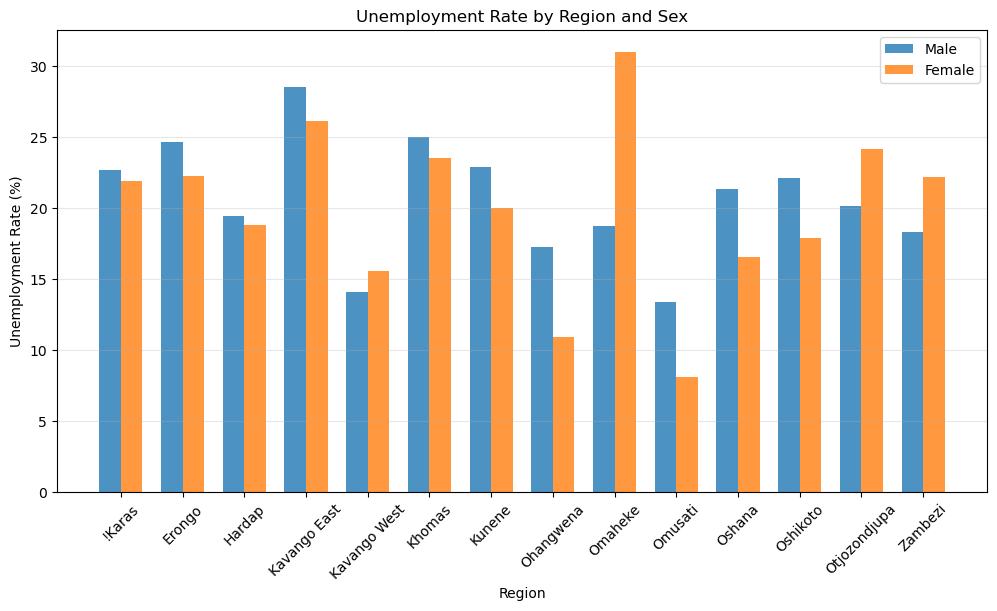

In [111]:
# Your code here:

regions = lfs_filtered['REGION'].unique()
results = []

for region in regions:
    region_data = lfs_filtered[lfs_filtered['REGION'] == region]
    men_lf = region_data[(region_data['SEX'] == 'Male') & 
                         (region_data['LFS_STRICT'].isin(['Employed', 'Unemployed']))]['SAMPLE_WEIGHT'].sum()
    men_unemp = region_data[(region_data['SEX'] == 'Male') & 
                            (region_data['LFS_STRICT'] == 'Unemployed')]['SAMPLE_WEIGHT'].sum()
    men_rate = (men_unemp / men_lf * 100) if men_lf > 0 else 0
    
    women_lf = region_data[(region_data['SEX'] == 'Female') & 
                           (region_data['LFS_STRICT'].isin(['Employed', 'Unemployed']))]['SAMPLE_WEIGHT'].sum()
    women_unemp = region_data[(region_data['SEX'] == 'Female') & 
                              (region_data['LFS_STRICT'] == 'Unemployed')]['SAMPLE_WEIGHT'].sum()
    women_rate = (women_unemp / women_lf * 100) if women_lf > 0 else 0
    
    results.append({
        'Region': region,
        'Male_Unemployment': men_rate,
        'Female_Unemployment': women_rate,
        'Difference': women_rate - men_rate
    })
# DataFrame for better plotting
results_df = pd.DataFrame(results)
print(f"Unemployment Rate organized by region: \n{results_df}")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))

bars1 = ax.bar(x - width/2, results_df['Male_Unemployment'], width, label='Male', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['Female_Unemployment'], width, label='Female', alpha=0.8)

ax.set_xlabel('Region')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Unemployment Rate by Region and Sex')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Region'], rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()

#### Comments on Findings

The majority of regions record higher male than female unemployment, with a few exceptions, especially of the region Omaheke (which records a rather low male rate and the highest female rate). The region Kavango East records the highest male rate and the region Omusati records the lowest rates for both sexes.

## 3-D {-}

Instead of employment rate, we could also consider if there are differences in the gross income earned. 

Calculate the weighted average for the gross income for each `SEX`. Note, the numpy package has a function `np.average()` which allows you to specify both a variable to take the average of but also the weights to apply to that average. In this case you would want to weight by the `SAMPLE_WEIGHT` variable. Be careful to check for `NaN` values in your variables.

Comment on your findings.

In [115]:
# Your code here:
data_clean = lfs_filtered.dropna(subset=['gross_income'])

male_data = data_clean[data_clean['SEX'] == 'Male']
male_avg_income = np.average(male_data['gross_income'], weights=male_data['SAMPLE_WEIGHT'])

female_data = data_clean[data_clean['SEX'] == 'Female']
female_avg_income = np.average(female_data['gross_income'], weights=female_data['SAMPLE_WEIGHT'])

print(f"Male average gross income: £{male_avg_income:.2f}")
print(f"Female average gross income: £{female_avg_income:.2f}")
print(f"Difference between the two: £{male_avg_income - female_avg_income:.2f}")
print(f"Difference as % of Male income: {((male_avg_income - female_avg_income)/male_avg_income)*100:.1f}%")

Male average gross income: £7535.18
Female average gross income: £6813.14
Difference between the two: £722.04
Difference as % of Male income: 9.6%


#### Comments on findings
On average, men earn more than women do, and the average difference is set at around £722. Their pay-gap is given by the difference, as percentage of male income, which is almost 10% (of male income).
It is important to note that these are raw figures and we are not aware of how they are determined (for example, by a difference in hours worked, type of employment, education, etc.).

## 3-E OPTIONAL {-}

Calculate the weighted average for the gross income for each `REGION`. Note, the numpy package has a function `np.average()` which allows you to specify both a variable to take the average of but also the weights to apply to that average. In this case you would want to weight by the `SAMPLE_WEIGHT` variable. Restrict your calculation to only those observations where both the `gross_income` and `SAMPLE_WEIGHT` exceed $0$.

Hint: You could accomplish this with a for loop where you filter by region. Alternatively you could use the `apply()` method to apply a function to a dataframe. You may find it easier to pre-define a function to use in this apply framework.

In [8]:
# Your code here:

## 3-F OPTIONAL {-}

Are there differences between Male and Female average gross incomes across the regions in the dataset? Combine your analysis from parts 3-D and 3-E above to explore the difference in gross income by both `SEX` and `REGION`.

Hint: recall that you can provide a list of variables to the `groupby()` method.

In [9]:
# Your code here:

## 3-G: OPTIONAL PROBLEM {-}

Given the history of the country, it may be important to look beyond region and examine results across ethnic groups. However, this LFS survey does not directly identify ethnic groups. However, the `READ_AND_WRITE_1` variable contains information on the primary language spoken by the respondent. As a simplification, create a new categorical variable `ETHNICITY` which uses the main language as a proxy to overcome this data limitation. Create the following categories based on languages:

1. African Languages: Ju/’hoansi, Silozi (Sikololo), Otjiherero, Rukwangali, Thimbukushu, Rumanyo, Khoekhoegowab, Oshikwanyama, Oshindonga, Setswana, isiXhosa, isiZulu, Swahili
2. Afrikaans Languages: Afrikaans
3. European Languages: German, English, French, Dutch, Portuguese, Italian
4. Consider all the other values as `NaN` values that must be excluded in this section

For additional information on creating a new categorical variable in pandas see the documentation [here](https://pandas.pydata.org/docs/user_guide/categorical.html#).

After creating this new variable, examine differences in either the employment rate or the gross income by ethnicity.

In [ ]:
# Your code here:

# Problem 4 - Brief Survey About Time Spent on the Initial Problem Sets and Data Request for Next Week {-}

Thank you for completing the above questions. To help me calibrate the length and difficulty of the problem sets, please answer the following brief [survey](https://moodle.lse.ac.uk/mod/questionnaire/view.php?id=1809554). The first two questions ask about your time spent on the initial problem sets and the final question asks for data which may be used to develop discussion examples for our class meetings next week.

When you have completed the survey, write 'Done' in the following cell.

_Write Done Here_

Done

In [6]:
from scipy.stats import binom
! jupyter nbconvert --to html PS2.ipynb --no-prompt

[NbConvertApp] Converting notebook PS2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 508055 bytes to PS2.html
